# ecuación de schrödinger

## ecuación de schrödinger y el metodo de Crank-Nicolson

Veremos la ecuación de Schrödinger en una dimensión. Las técnicas para calcular soluciones en dos o tres dimensiones son básicamente las mismas que para una dimensión, pero los cálculos tardan mucho más en la computadora, por lo que, en horas de la velocidad, nos quedaremos con una dimensión. En una dimensión, la ecuación de Schrödinger para una partícula de masa M sin energía potencial dice

$$
\frac{\hbar^2}{2M} \frac{\partial^2 \psi}{\partial x^2} = i \hbar \frac{\partial \psi}{\partial x}
$$

Por simplicidad, pongamos nuestra partícula en una caja con paredes impenetrables, de modo que solo tengamos que resolver la ecuación en un espacio de tamaño finito. La caja obliga a la función de onda a ser cero en los pocillos, que pondremos en x = 0 y x = L. Reemplazando la segunda derivada en la ecuación de Schrödinger con una diferencia finita y aplicando el método de Euler, obtenemos la ecuación de FTCS.<br>

reemplazando la segunda derivada en la ecuación de Scrödinger con una diferencia finita y aplicando el metodo de Euler, obtenemos la ecuación FTCS.

$$
\psi(x,t+h)= \psi(x,t) +h\frac{i \hbar}{2ma^2}[\psi(x+a,t)+\psi(x-a,t)-2\psi(x,t)]
$$

donde a es el espaciado de los puntos de la cuadrícula espacial y h es el tamaño del paso de tiempo. (Tenga cuidado de no confundir el paso de tiempo h con la constante de Planck h.), Realizando un
paso a la inversa, obtenemos la ecuación implícita.

$$
\psi(x,t+h)- h\frac{i \hbar}{2ma^2}[\psi(x+a,t+h)+\psi(x-a,t+h)-2\psi(x,t+h)]=\psi(x,t)
$$

Y tomando el promedio de estos dos, obtenemos la ecuación de Crank-Nicholson para la ecuación de Schrödinger.
### Ecuación de Crank-Nicholson para la ecuación de Schrödinger
$$
\psi(x,t+h)- h\frac{i \hbar}{4ma^2}[\psi(x+a,t+h)+\psi(x-a,t+h)-2\psi(x,t+h)]=\psi(x,t)+h\frac{i \hbar}{4ma^2}[\psi(x+a,t)+\psi(x-a,t)-2\psi(x,t)]
$$

Esto nos da un conjunto de ecuaciones simultáneas, una para cada punto de la cuadrícula. Las condiciones de contorno de nuestro problema nos dicen que $\psi$ = 0 en x=0 y x = L para todos t. Entre estos puntos tenemos puntos de cuadrícula en a, 2a, 3a, y así sucesivamente. Ordenemos los valores de en estos puntos interiores en un vector

$$
\psi(t)=
\begin{pmatrix}
\psi(a,t)\\ 
\psi(2a,t)\\ 
\psi(3a,t)\\ 
\vdots 
\end{pmatrix}
$$

la ecuación de Crank-Nicolson se puede escribir de la siguiente forma

$$
A \psi(t+h)=B \psi(t)
$$

Donde las matrices A y B son simetricas y tridiagonales

$$
A=
\begin{pmatrix}
a_1 & a_2 &  &  & \\ 
a_2 & a_1 & a_2 &  & \\ 
 & a_2 & a_1 & a_2 & \\ 
 &  & a_2 & a_1 & \\ 
 &  &  &  & \ddots 
\end{pmatrix},
B=
\begin{pmatrix}
b_1 & b_2 &  &  & \\ 
b_2 & b_1 & b_2 &  & \\ 
 & b_2 & b_1 & b_2 & \\ 
 &  & b_2 & b_1 & \\ 
 &  &  &  & \ddots 
\end{pmatrix}
$$

con 

$$
a_1=1+h\frac{i \hbar}{2ma^2}, a_2=-h\frac{i \hbar}{4ma^2}, b_1=1-h\frac{i \hbar}{2ma^2}, b_2=h\frac{i \hbar}{4ma^2}
$$

In [1]:
using Plots
using LinearAlgebra

In [2]:
# Creando las constante
L=1 # largo de la caja
N=100 # numero de pasos en el espacio y tiempo
a=L/N #discretización del espacio
tf=1 #tiempo final
h=tf/N # discretización del tiempo

0.01

In [3]:
# Creamos el vector inicial \psi(0)
ψ=Array{Complex}(undef,N)
x=fill(0.0,N)
t=fill(0.0,N)
ψ[1]=0
ψ[N]=0
#creamos las constantes
xₒ=L/2
σ=5e-2
κ=5e10
ħ=1.054e-34
m=9.109e-31
#Lo llenamos
for i in (1:(N-1))
    x[i+1]=a*i
    t[i+1]=h*i
    ψ[i+1]=exp(-(a*i-xₒ)^2/(2*σ^2))*exp(κ*a*i*im)
end

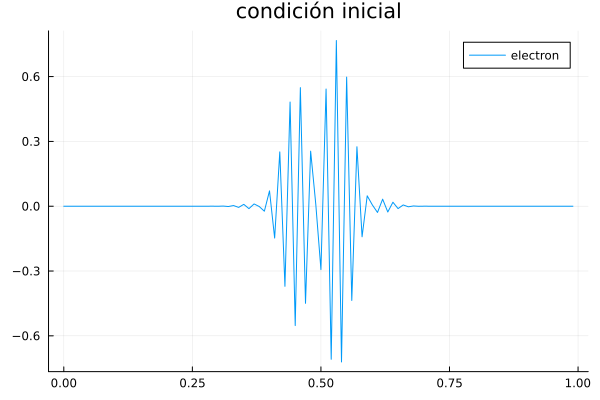

In [4]:
plot(x,real(ψ),label="electron")
title!("condición inicial")

In [5]:
#creamos las constantes
a₁=1+h*im*ħ/(2*m*a^2)
a₂=-h*im*ħ/(2*m*a^2)
b₁=1-h*im*ħ/(2*m*a^2)
b₂=h*im*ħ/(2*m*a^2)

0.0 + 0.005785486881106598im

In [6]:
#solucion del problema
Va₁=fill(a₁,N)
Va₂=fill(a₂,N-1)
Vb₁=fill(b₁,N)
Vb₂=fill(b₂,N-1)
A=Tridiagonal(Va₂,Va₁,Va₂)
B=Tridiagonal(Vb₂,Vb₁,Vb₂)
M=B/A
Mψ=Array{Complex}(undef,N,N)
Mψ[:,1]=ψ
for i in (2:N)
    Mψ[:,i]=M*Mψ[:,i-1]
end

┌ Info: Saved animation to 
│   fn = C:\Users\juand\computacional II\ecuaciondeonda_fps60.gif
└ @ Plots C:\Users\juand\.julia\packages\Plots\4UTBj\src\animation.jl:154


Plots.AnimatedGif("C:\\Users\\juand\\computacional II\\ecuaciondeonda_fps60.gif")
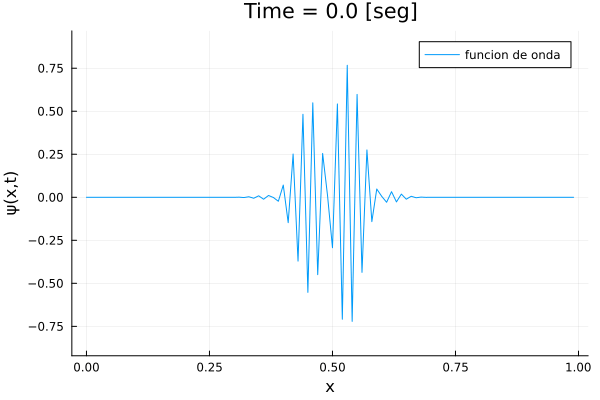

In [7]:
#simulación
anim = @animate for i in 1:N
    plot(x,real(Mψ[:,i]),label="funcion de onda")
    ylims!(minimum(real(ψ))-0.2,maximum(real(ψ))+0.2)
    ylabel!("ψ(x,t)")
    xlabel!("x")
    title!("Time = " * string(round(t[i], digits=2)) * " [seg]")
end
gif(anim, "ecuaciondeonda_fps60.gif", fps = 60)